<a href="https://colab.research.google.com/github/kimhwijin/KFood_Models/blob/master/KFood_Dataset_Unzip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import os
import zipfile
import numpy as np
import csv
import matplotlib.pyplot as plt

In [4]:
DATASET_PATH = Path(os.getcwd())
root_path = DATASET_PATH / "kfood"

In [8]:
dest_path = DATASET_PATH / "kfood"
if not dest_path.exists():
    with zipfile.ZipFile(DATASET_PATH / "kfood.zip") as kfood:
        zipInfo = kfood.infolist()
        for member in zipInfo:
            try:
                print(member.filename.encode('cp437').decode('euc-kr', 'ignore'))
                member.filename = member.filename.encode('cp437').decode('euc-kr', 'ignore')
                kfood.extract(member, dest_path)
            except:
                #print(source_file)
                raise Exception('what?!')


구이.zip
국.zip
기타.zip
김치.zip
나물.zip
떡.zip
만두.zip
면.zip
무침.zip
밥.zip
볶음.zip
쌈.zip
음청류.zip
장.zip
장아찌.zip
적.zip
전.zip
전골.zip
조림.zip
죽.zip
찌개.zip
찜.zip
탕.zip
튀김.zip
한과.zip
해물.zip
회.zip


In [9]:
zipfile_paths = list(root_path.glob("*.zip"))

for fname in zipfile_paths:
    fname = fname.stem
    dest_path = root_path
    print(fname)
    with zipfile.ZipFile(root_path / "{}.zip".format(fname), "r") as zf:
        zipInfo = zf.infolist()
        for member in zipInfo:
            member.filename = member.filename.encode('utf8').decode("utf8", "ignore")
            zf.extract(member, dest_path)   


탕
볶음
조림
무침
만두
김치
떡
전골
튀김
구이
음청류
장아찌
장
국
회
찌개
죽
나물
쌈
기타
밥
한과
찜
해물
전
적
면


In [5]:
cat_names = os.listdir(root_path)
cat_names = [root_path / name for name in cat_names if os.path.isdir(os.path.join(root_path, name))]
print(cat_names)

[PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/적'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/기타'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/회'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/밥'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/무침'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/만두'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/구이'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/나물'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/탕'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/쌈'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/국'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/장'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/면'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/전골'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/떡'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/전'), PosixPath('/Users/hwijin/Desktop/Code/ml/KFood/kfood/해물'), PosixP

In [6]:
from PIL import Image
path = root_path / "국/계란국/Img_014_0000.jpg"

with Image.open(path) as image:
    np_image = np.array(image)

print(np_image.shape)


(645, 430, 3)


In [7]:
def create_example_protoc(image, label):
    serialized_image = tf.io.serialize_tensor(image)
    return tf.train.Features(
            feature={
                "image" : tf.train.Feature(bytes_list=tf.train.BytesList(value=[serialized_image.numpy()])),
                "label" : tf.train.Feature(int64_list=tf.train.Int64List(value=[label])),
            }
        )

In [8]:
label_paths = list(root_path.glob("*/*"))
label_paths = [label_path for label_path in label_paths if label_path.is_dir()]

label_name_index_dict = {}
for index, label_path in enumerate(label_paths):
    label_name_index_dict[label_path.stem] = index
print(label_name_index_dict.items())

with open(root_path / 'class_label.csv','w') as f:
    w = csv.writer(f)
    w.writerow(label_name_index_dict.keys())
    w.writerow(label_name_index_dict.values())

dict_items([('떡꼬치', 0), ('편육', 1), ('후라이드치킨', 2), ('콩자반', 3), ('젓갈', 4), ('양념치킨', 5), ('과메기', 6), ('피자', 7), ('육회', 8), ('물회', 9), ('알밥', 10), ('누룽지', 11), ('김치볶음밥', 12), ('김밥', 13), ('비빔밥', 14), ('새우볶음밥', 15), ('유부초밥', 16), ('잡곡밥', 17), ('주먹밥', 18), ('회무침', 19), ('꽈리고추무침', 20), ('도라지무침', 21), ('콩나물무침', 22), ('홍어무침', 23), ('잡채', 24), ('도토리묵', 25), ('만두', 26), ('더덕구이', 27), ('떡갈비', 28), ('갈비구이', 29), ('훈제오리', 30), ('장어구이', 31), ('삼겹살', 32), ('불고기', 33), ('황태구이', 34), ('조기구이', 35), ('조개구이', 36), ('갈치구이', 37), ('고등어구이', 38), ('곱창구이', 39), ('닭갈비', 40), ('미역줄기볶음', 41), ('고사리나물', 42), ('가지볶음', 43), ('애호박볶음', 44), ('숙주나물', 45), ('시금치나물', 46), ('갈비탕', 47), ('매운탕', 48), ('감자탕', 49), ('추어탕', 50), ('곰탕_설렁탕', 51), ('삼계탕', 52), ('보쌈', 53), ('육개장', 54), ('북엇국', 55), ('콩나물국', 56), ('무국', 57), ('계란국', 58), ('미역국', 59), ('떡국_만두국', 60), ('시래기국', 61), ('간장게장', 62), ('양념게장', 63), ('물냉면', 64), ('수제비', 65), ('콩국수', 66), ('막국수', 67), ('열무국수', 68), ('비빔냉면', 69), ('짜장면', 70), ('쫄면', 71), ('칼국수', 72), ('잔치국수', 

In [51]:
from contextlib import ExitStack

tfrecords_path = root_path / "tfrecords"
if not tfrecords_path.exists():
    os.mkdir(tfrecords_path)


def write_tfrecords(filepath, n_shards=1): #파일 조각 개수

    print(filepath.stem, end=' ')
    paths = [ str(tfrecords_path) + "/{}.tfrecord-{:05d}-{:05d}".format(filepath.stem, index+1, n_shards) for index in range(n_shards)]
    image_crops = get_image_crops(filepath)
    max_image_crop_index = len(image_crops) - 1
    image_crop_index = 0
    image_paths = get_image_paths(filepath)

    with ExitStack() as stack:
        writers = [stack.enter_context(tf.io.TFRecordWriter(path)) for path in paths]
        for index, image_path in enumerate(image_paths):

            shard = index % n_shards
            with Image.open(image_path) as image:
                
                tf_image = tf.constant(image)
                if tf.shape(tf_image)[-1] == 3:    
                    if image_path.stem == image_crops[image_crop_index][0]:
                        tf_image = tf.image.crop_to_bounding_box(tf_image, *image_crops[image_crop_index][1])
                        image_crop_index = image_crop_index + 1 if max_image_crop_index > image_crop_index else max_image_crop_index

                    example = create_example_protoc(tf_image, label_name_index_dict[filepath.stem])
                    writers[shard].write(example.SerializeToString())
                    
    return paths

def get_image_paths(filepath, image_formats=("*.j*", "*.J*", "*.png", "*.PNG", "*.b*", "*.B*", '*.g*', '*.G*')):
    paths = []
    for image_format in image_formats:
        paths += list(filepath.glob(image_format))
    return sorted(paths)

def get_image_crops(filepath):
    crops = []
    properties = filepath / "crop_area.properties"
    with open(properties, 'r') as p:
        for row in p:
            name, crop = row.replace("\n", "").replace(" ", "").split("=")
            if name != "" and crop != "":
                crop = crop.split(",")
                if len(crop) >= 4:
                    crop = [int(crop[1]), int(crop[0]), int(crop[3]), int(crop[2])]
                    crops.append([name, crop])
                elif len(crop) == 2:
                    crop = [0, 0, int(crop[1]), int(crop[0])]
                    crops.append([name, crop])
    return crops

In [52]:
index = 0
max_index = len(label_paths)
for label_path in label_paths:
    print(index , max_index ,os.path.getsize(write_tfrecords(label_path)[0]) // 1000000)
    

떡꼬치 0 150 662
편육 0 150 616
후라이드치킨 0 150 1088
콩자반 0 150 751
젓갈 0 150 832
양념치킨 0 150 1668
과메기 0 150 374
피자 0 150 819
육회 0 150 326
물회 0 150 543
알밥 0 150 488
누룽지 0 150 851
김치볶음밥 0 150 1027
김밥 0 150 1045
비빔밥 0 150 1080
새우볶음밥 0 150 905
유부초밥 0 150 433
잡곡밥 0 150 878
주먹밥 0 150 344
회무침 0 150 592
꽈리고추무침 0 150 866
도라지무침 0 150 906
콩나물무침 0 150 832
홍어무침 0 150 328
잡채 0 150 880
도토리묵 0 150 822
만두 0 150 428
더덕구이 0 150 1025
떡갈비 0 150 1153
갈비구이 0 150 705
훈제오리 0 150 748
장어구이 0 150 1274
삼겹살 0 150 869
불고기 0 150 928
황태구이 0 150 1015
조기구이 0 150 660
조개구이 0 150 623
갈치구이 0 150 1055
고등어구이 0 150 846
곱창구이 0 150 663
닭갈비 0 150 1102
미역줄기볶음 0 150 764
고사리나물 0 150 864
가지볶음 0 150 870
애호박볶음 0 150 622
숙주나물 0 150 836
시금치나물 0 150 733
갈비탕 0 150 1022
매운탕 0 150 774
감자탕 0 150 892
추어탕 0 150 960
곰탕_설렁탕 0 150 853
삼계탕 0 150 767
보쌈 0 150 1207
육개장 0 150 1086
북엇국 0 150 1074
콩나물국 0 150 963
무국 0 150 821
계란국 0 150 910
미역국 0 150 926
떡국_만두국 0 150 1229
시래기국 0 150 907
간장게장 0 150 1356
양념게장 0 150 623
물냉면 0 150 1684
수제비 0 150 1275
콩국수 0 150 1352
막국수

/Users/hwijin/miniforge3/envs/tf25/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:811: UserWarning: Truncated File Read
  warnings.warn(str(msg))


0 150 841
두부조림 0 150 811
연근조림 0 150 619
장조림 0 150 961
고등어조림 0 150 826
꽁치조림 0 150 711
새우튀김 0 150 371
오징어튀김 0 150 543
고추튀김 0 150 444
깍두기 0 150 793
무생채 0 150 863
나박김치 0 150 798
백김치 0 150 860
오이소박이 0 150 970
갓김치 0 150 860
열무김치 0 150 1043
파김치 0 150 1040
배추김치 0 150 870
부추김치 0 150 902
총각김치 0 150 1014
순두부찌개 0 150 927
김치찌개 0 150 1262
된장찌개 0 150 1046
동태찌개 0 150 658
닭계장 0 150 936
호박죽 0 150 444
전복죽 0 150 462


1


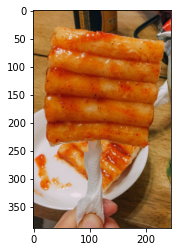

In [50]:
i_paths = get_image_paths(root_path / "적/떡꼬치")

with Image.open(i_paths[54]) as image:
    tf_image = tf.constant(image)
    tf_image = tf.image.crop_to_bounding_box(tf_image, 12, 124, 388, 246)
    if tf.shape(tf_image)[-1] == 3:
        print(1)
    plt.imshow(tf_image)
    #12 124 388 246
    